# Model Project

In [27]:
import numpy as np
from scipy import linalg
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [28]:
import numpy as np
import scipy as sp
from scipy import linalg
from scipy import optimize
from scipy import interpolate
import sympy as sm

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Model description

We consider a solow model for a closed economy with no growth in technology: 

* $K_t$ is capital
* $L_t$ is labor (growing with a constant rate of $n$)
* $Y_t = F(K_t,L_t)$ is GDP

We have the following equations:

$$Y_t = BK_t^\alpha L_t^{1-\alpha}$$
$$L_{t+1} = (1+n) L_t$$

**Saving** can be defined as the following fraction:

$$ S_t = sY_t,\,s\in(0,1) $$

These equations imply that the rate and the wage is the following:

$$r_t = \alpha B \big(\frac{K_t}{L_t}\big)^{\alpha-1}$$
$$w_t = (1-\alpha) B \big(\frac{K_t}{L_t}\big)^{\alpha}$$

Capital accumulation is therefore:

$$K_{t+1}= K_t + I_t-\delta K_t$$

$k_t$ can be defined as:

$$k_t = \frac{K_t}{Y_t}$$

Using the intertemporal budget constraint it is possible to show that the transition equation is:

$$ k_{t+1} = \frac{1}{1+n}(sBk_t^\alpha+(1-\delta)k_t)$$

# Steady state

## Analytical solution

In a standard solowmodel there is only a steady state in pr. capita values. In the transition equation we set $k_{t+1} = k_t = k$ and by doing that we get the steady state values for $y_t$ and $k_t$.
$$ k = \frac{1}{1+n}(sBk^\alpha+(1-\delta)k)$$

In [29]:
# We define our variables/symbols:
k = sm.symbols('k')
alpha = sm.symbols('alpha')
delta = sm.symbols('delta')
s = sm.symbols('s')
n = sm.symbols('n')
B = sm.symbols('B')

In [30]:
# Here we define the steady state equation
ss = sm.Eq(k,(s*B*k**alpha+(1-delta)*k)/((1+n)))

In [34]:
#Then we solve the steady state equation
kss = sm.solve(ss,k)[0]
kss

(B*s/(delta + n))**(-1/(alpha - 1))

In [6]:
# The code below saves our soloution as a function which will be handy later 
ss_func = sm.lambdify((s,B,n,alpha,delta),kss)

## Numerical solution

When the numerical solution is done we have to choose some values for our parameters, we have chosen ones that we find reasonable:

In [7]:
# Setting values for our parameters:
s = 0.2
B = 1
n = 0.01
alpha = 1/3
delta = 0.1

When we want to find the steady state level of capital we examine the following equation:
$$ 0 = k - \frac{1}{1+n}(sBk^\alpha+(1-\delta)k)$$
What the optimizer then does it try to numerically find a k that solves this equation, we use the method called bisect which we will explain after the optimizer.

In [8]:
from scipy import optimize
# This peace of code makes a function that can numerically solve for steady state for our given model.
# We give this function our parameters and then it gives us the steady state level of capital.
def solve_for_ss(s,B,n,alpha,delta):
    """Args:
        s (float): saving rate
        B (float): Technology level
        n (float): population growth rate
        alpha (float): cobb-douglas parameter
        delta (float): capital depreciation rate 

    Returns:
        result (RootResults): The steady state level of capital
    """ 
    
    # a. define objective function
    f = lambda k: k**alpha
    # 
    obj_kss = lambda kss: kss - (s*B*f(kss) + (1-delta)*kss)/((1+n))

    #. b. call root finder
    result = optimize.root_scalar(obj_kss,bracket=[0.1,100],method='bisect')
    
    return result

We have used the algorythm "bisect" to do this optimisation. The bisect method works the following way, the algorythm chooses 2 values of x, a and b. When it chooses these values it makes sure that f(a) and f(b) has different signs. Then it figures out what the middlepoint between a and b are by doing $  m_0 = \frac{a+b}{2} $ whereafter it checks the sign of $m_0$. After this if f(a) and f($m_0$) has different signs then the next interval it examines will be $[a,m_0]$. If this is not the case it does the same thing with f(b) and f($m_0$). It keeps doing this same thing until f($m_0$) is sufficiently close to 0. 

We have tried to plot this below. Lets say we want to find the roots of the polyonomial below. What the algoryhthm then does is it chooses an a and a b for example a=-13 and b=-5. These values are depicted in the picture as the green vertical lines notice that f(a) and f(b) do have different signs. The algorythm then calculates that $m_0=-9$ which is depicted with the vertical yellow line. The next interval the algorythm will examine will then be between a=-13 and $m_0$=-9 since f(a) and f($m_0$) have different signs, while f(b) and f($m_0$) are both negative values which leads to this interval being discarded. 

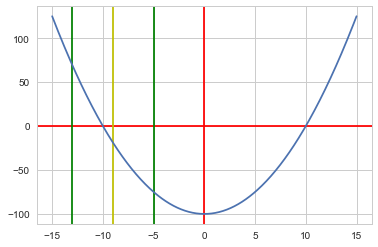

In [9]:
# Choosing the x and y intervals and creating the function
x = np.linspace(-15,15,400)
y = x**2-100
# Plotting the axes
plt.axhline(y=0, color='r', linestyle='-')
plt.axvline(x=0, color='r')
# Plotting a and b
plt.axvline(x=-13, color='g')
plt.axvline(x=-5, color='g')
# Plotting m_0
plt.axvline(x=-9, color='y')
# Creating the plot:
plt.plot(x,y)
plt.show()

The next thing we do is call the function and check the solution.

In [10]:
solve_for_ss(s,B,n,alpha,delta)

      converged: True
           flag: 'converged'
 function_calls: 48
     iterations: 46
           root: 2.4516358635037063

We see that our function has done 46 iterations which means it has redone the procedure above 46 times, and called the function 48 times. This is perfectly in line with what we imagine with 46 iterations it has to check f(a), f(b) and then it checks f($m_0$) 46 times which gives 48 function calls.
We now check wether this solution is the same as the one we would find analytically:

In [11]:
solution = solve_for_ss(s,B,n,alpha,delta)
print(f' numerical solution is: {solution.root:.3f}')
print(f'analytical solution is: {ss_func(s,B,n,alpha,delta):.3f}')

 numerical solution is: 2.452
analytical solution is: 2.452


We luckily find that the numerical and analytical solution is the same.

## Graphical representation

We would like to see the transition diagram, to see the transition towards steady state. We would also like to examine what happens if we change the savings rate s. 

In [12]:
# First we make a function that calculates capital in period 1 when we have capital in period 0. 
def transition(k,s,B,n,alpha, delta):
    """
    Returns:
    k1(float) capital in the next period
    
    Args:
    k (float): Initial stock of capital
    B (float): Technology level
    s (float): The savings rate
    alpha (float): cobb-douglas parameter
    delta (float): capital depreciation rate 
    n (float): Population growth 
    
    """
    # Calculating capital in period 1
    k1 = (s*B*k**alpha+(1-delta)*k)/((1+n))
    return k1

We now want to store capital for each period which we can do by calculating them one after another and putting them in an array:

In [13]:
def transition_curve(k,s,B,n,alpha, delta,T=1000,k_min=1e-20,k_max=6):
    """
    Returns:
    k_1(array): Array of capital in period 1
    k_2(array): Array of capital in period 2
    
    Args:
    k (float): Initial stock of capital
    B (float): Technology level
    s (float): The savings rate
    alpha (float): cobb-douglas parameter
    delta (float): capital depreciation rate 
    n (float): Population growth 
    
    output: 
    For every value of capital computes the value of capital in the next period using the transition equation. 
    """
    
    #grids
    k_1 = np.linspace(k_min,k_max,T)
    k_1 = np.linspace(1e-20,6,T)
    k_2 = np.empty(T)
    
    #construct array of "tomorrows" capital
    for i,k in enumerate(k_1):
        k_plus = transition(k,s,B,n,alpha, delta)
        k_2[i] = k_plus
        
    return k_1, k_2

Atlast we want to draw the figure with a widget and for this reason we make a function that draws the transition diagram depending on s.

In [14]:
def fig(s):
    """
    Returns:
    Plots the transition curve
    
    Args:
    s: savings rate
    """
    #parameters
    alpha = 1/3
    s = s
    B = 1
    n = 0.2
    delta = 0.2
    #transition curve
    k_1, k_2 = transition_curve(k,s,B,n,alpha, delta,T=1000,k_min=1e-20,k_max=6)
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(k_1,k_2, label="Transition curve") #transition curve
    ax.plot(k_1,k_1, '--', color='grey',label="45 degree") #45 degree line
    ax.set_xlabel('$k_t$')
    ax.set_ylabel('$k_t+1$')
    ax.set_title('Transition curve')
    ax.legend()
    ax.set_xlim([0,4])
    ax.set_ylim([0,4]);
    return
# Making the widget:
import ipywidgets as widgets
widgets.interact(fig, 
    s = widgets.FloatSlider(description='s', min=0, max=1, step=0.01, value=0.5),
);

interactive(children=(FloatSlider(value=0.5, description='s', max=1.0, step=0.01), Output()), _dom_classes=('w…

# Model extensions

We would like to specify the model so that it better fits Denmark. We do this by converting the model into a solowmodel on a small open economy. The new model is similar to the old model in a lot of ways, but some changes are made. In an open economy it is assumed that there is capital movements are free which means that the rate cannot differ between countries. When we assume that it is a small economy, we also assume that the economy cannot affect the global rental rate. 

The equation system that this new model is characterised by is the following:

$$ Y_t = BK_t^\alpha L_t^{1-\alpha}$$
$$ L_{t+1} = (1+n) L_t $$
$$ S_t = sY_t,\,s\in(0,1) $$

In this model we have to define wealth which we name V and F is receivables:

$$ V_t = K_t + F_t $$

The reason for the creation of the wealth value is that we there is no steady state in capital pr. worker since capital no longer is accumelated. Instead we can examine the transition equation in wealth:

$$ v_{t+1} = \frac{sw*}{1+n}+\frac{1+s\bar{r}}{1+n}v_t $$

Where w and r are defined as in the beginning which means:
$$\bar{r} = \alpha B \big(\frac{K_t}{L_t}\big)^{\alpha-1}$$
$$w* = (1-\alpha) B \big(\frac{K_t}{L_t}\big)^{\alpha}$$

The equation for the rate ensures that:
$$ k_t = k* $$
Which means that the rate and the wage always is in steady state.

In this model we also have the national income which is the income of the country plus the income you get from recievables from foreign countries:
$$ Y_t^n = Y_t + \bar{r}F_t$$

At first we want to solve the model, and we do it both numerically and analytically:

## Analytical solution:

First of all we again define our variables/symbols, and we also define the steady state equation

In [15]:
# Defining our symbols:
v = sm.symbols('v')
alpha = sm.symbols('alpha')
delta = sm.symbols('delta')
s = sm.symbols('s')
n = sm.symbols('n')
B = sm.symbols('B')
k = sm.symbols('k')
w = sm.symbols('w')
r = sm.symbols('r')
# Creating the steady state equation:
ssopen = sm.Eq(v,(s*w/(1+n))+((1-delta+s*r)/(1+n))*v)

We solve the model:

In [16]:
# Solving the model:
vss = sm.solve(ssopen,v)[0]
# Saving the solution:
ssopen_func = sm.lambdify((s,B,n,r,k,w,alpha,delta),vss)
# Displaying the analytical solution solution:
vss

s*w/(delta + n - r*s)

## Numerical soltution:

We again define our parameter values:

In [17]:
s = 0.2
B = 1
n = 0.01
k= 2
alpha = 1/3
delta = 0.1
w = (1-alpha)*B*k**alpha
r = alpha*B*k**(alpha-1)

In [18]:
# Here we practically do the same as before we create a function that solves our model using the bisect method:
def solve_for_ssopen(s,B,n,k, alpha,delta):
    """ solve for the steady state level of capital

    Args:
        s (float): saving rate
        B (float): Technology level
        n (float): population growth rate
        k (float): Capital pr. worker
        alpha (float): cobb-douglas parameter
        delta (float): capital depreciation rate 

    Returns:
        result (RootResults): The steady state wealth pr. worker in the economy

    """ 
    
    # a. define objective function
    obj_vss = lambda vss: vss - ((s*w/(1+n))+((1-delta+s*r)/(1+n))*vss)

    #. b. call root finder
    result = optimize.root_scalar(obj_vss,bracket=[0.1,100],method='bisect')
    
    return result

We then check if our analytical solution and or numerical solution is the same:

In [19]:
solution = solve_for_ssopen(s,B,n,k,alpha,delta)
print(f' numerical solution is: {solution.root:.3f}')
print(f'analytical solution is: {ssopen_func(s,B,n,r,k,w,alpha,delta):.3f}')

 numerical solution is: 2.470
analytical solution is: 2.470


We luckily find that they match up.

## Benefits of opening up a closed economy:

We now want to examine what happens if a closed economy opens up. We will do this by looking at our first model and then examining what happens if we change it to the second one. The most interesting variabel to do the comparrison on is output pr. worker. Therefore we calculate the output pr. worker in steady state of our first model and compare it to the output pr. worker in an open economy with the same parameters. We can then examine whether there is welfare gain connected to opening an economy.

In the simple model output pr. worker is $$y_t = B k_t^\alpha $$

In [20]:
# Setting values for our parameters:
s = 0.2
B = 1
n = 0.01
alpha = 1/3
delta = 0.1
# we also define k as the one we calculated in the original model
k = 2.452

In the simple model output pr. worker is $$y_t = B k_t^\alpha $$
We also remember that we can calculate the rate and the wage the following way: 
$$r_t = \alpha B \big(\frac{K_t}{L_t}\big)^{\alpha-1}$$
$$w_t = (1-\alpha) B \big(\frac{K_t}{L_t}\big)^{\alpha}$$

We can through this calculate the steady state values for the original closed economy. 

In [21]:
print(f' Output pr. worker in the closed economy is: {B*ss_func(s,B,n,alpha,delta)**alpha}') 
print(f' The rental rate in the closed economy is: {alpha*B*k**(alpha-1)}')
print(f' The wage in the closed economy is: {(1-alpha)*B*k**(alpha)}')

 Output pr. worker in the closed economy is: 1.348399724926484
 The rental rate in the closed economy is: 0.1833151821614239
 The wage in the closed economy is: 0.898977653319623


When a small closed economy is opened the rate will instantaniously adapt and become equal to the rental rate of the outside world. This means that our examination depends on what the rate of the outside world is at the point of opening the economy. In our model the adaption time is almost instant, if we open the economy in period 0 then the economy is back in steady state in period 1. 

We calculate the national output given the rate through a funciton:

In [22]:
# Defining a function that can calculate the national output given the rate:
def national_output_calc(s,B,n,alpha,delta,r):
    k = ((B*alpha)/r)**(1/(1-alpha))
    w = (1-alpha)*B**(1/(1-alpha))*(alpha/r)**(alpha/(1-alpha))
    v = (s*w)/(n+delta-s*r)
    y = w + r*v
    return y

Now we draw the function defined above, so that we can examine what the nation income pr. worker is given different rates in the outside world. In the plot we also put a vertical line for the rate of the closed economy and a horisental line for the old level of output pr. worker.

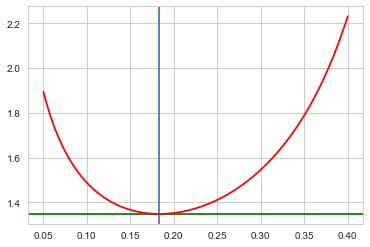

In [23]:
# 100 linearly spaced numbers
x = np.linspace(0.05,0.4,100)

# Define the function we want to be drawn
y = national_output_calc(s,B,n,alpha,delta,x)

# Creating the plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# Plotting vertical and horisontal line
plt.axhline(y=B*ss_func(s,B,n,alpha,delta)**alpha, color='g')
plt.axvline(x=alpha*B*k**(alpha-1))
# plot the function
plt.plot(x,y, 'r')

# show the plot
plt.show()

We see from the graph that there is welfare gains connected to opening up the economy. In case of domestic rate being equal to the rate foreign the output pr. worker is unchanged but in all other cases there is welfare gains.

# Conclusion

The conclusion of this project is that closed economies will experience an increase in the output pr. worker by opening the economy as long as the domestic interest rate is not equal to the foreign interest rate. 